In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import tree


merge = pd.read_csv('Resources/df_merged_newWV.csv')
merge.head()

,Unnamed: 0,Year,RegionDisplay,WorldBankIncomeGroupDisplay,Country,SexDisplay,Status,Life_expectancy_,Adult_Mortality,infant_deaths,...,_BMI_,under-five_deaths_,Polio,Total_expenditure,Diphtheria_,_HIV/AIDS,GDP,Population,Income_composition_of_resources,Schooling
0,0,2012,Europe,High_income,Ireland,Male,Developed,85.0,69.0,0,...,6.5,0,95.0,8.32,95.0,0.1,49231.36254,4586897.0,0.895,18.5
1,5,2012,Europe,High_income,Ireland,Female,Developed,85.0,69.0,0,...,6.5,0,95.0,8.32,95.0,0.1,49231.36254,4586897.0,0.895,18.5
2,28,2012,Americas,Upper_middle_income,Chile,Male,Developing,79.9,84.0,2,...,61.8,2,9.0,7.24,9.0,0.1,15431.92930,1739746.0,0.826,15.5
3,29,2012,Americas,Upper_middle_income,Chile,Female,Developing,79.9,84.0,2,...,61.8,2,9.0,7.24,9.0,0.1,15431.92930,1739746.0,0.826,15.5
4,92,2012,Western Pacific,High_income,Australia,Male,Developed,82.3,61.0,1,...,65.0,1,92.0,9.36,92.0,0.1,67677.63477,22728254.0,0.930,20.1


In [2]:
merge.columns

Index(['Unnamed: 0', 'Year', 'RegionDisplay', 'WorldBankIncomeGroupDisplay',
       'Country', 'SexDisplay', 'Status', 'Life_expectancy_',
       'Adult_Mortality', 'infant_deaths', 'Alcohol', 'percentage_expenditure',
       'Hepatitis_B', 'Measles_', '_BMI_', 'under-five_deaths_', 'Polio',
       'Total_expenditure', 'Diphtheria_', '_HIV/AIDS', 'GDP', 'Population',
       'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [3]:
final = merge.drop(columns=['Country','Unnamed: 0','Year','Measles_','under-five_deaths_','Polio','Diphtheria_','_HIV/AIDS','infant_deaths'])


In [4]:
#final['longevity'] = np.where(final['Life_expectancy_']>=78, 'long-lived', 'medium-lived')


In [5]:
final.columns

Index(['RegionDisplay', 'WorldBankIncomeGroupDisplay', 'SexDisplay', 'Status',
       'Life_expectancy_', 'Adult_Mortality', 'Alcohol',
       'percentage_expenditure', 'Hepatitis_B', '_BMI_', 'Total_expenditure',
       'GDP', 'Population', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [6]:
#final = final.drop(columns=['Life_expectancy_'])
#final.head()

In [7]:
final.head()

,RegionDisplay,WorldBankIncomeGroupDisplay,SexDisplay,Status,Life_expectancy_,Adult_Mortality,Alcohol,percentage_expenditure,Hepatitis_B,_BMI_,Total_expenditure,GDP,Population,Income_composition_of_resources,Schooling
0,Europe,High_income,Male,Developed,85.0,69.0,11.49,6616.695125,95.0,6.5,8.32,49231.36254,4586897.0,0.895,18.5
1,Europe,High_income,Female,Developed,85.0,69.0,11.49,6616.695125,95.0,6.5,8.32,49231.36254,4586897.0,0.895,18.5
2,Americas,Upper_middle_income,Male,Developing,79.9,84.0,6.76,2260.777642,9.0,61.8,7.24,15431.92930,1739746.0,0.826,15.5
3,Americas,Upper_middle_income,Female,Developing,79.9,84.0,6.76,2260.777642,9.0,61.8,7.24,15431.92930,1739746.0,0.826,15.5
4,Western Pacific,High_income,Male,Developed,82.3,61.0,10.03,11714.998580,91.0,65.0,9.36,67677.63477,22728254.0,0.930,20.1


# Clustering K-Means

In [8]:
#KMEANS
df=final[['Life_expectancy_','Alcohol']]
df.head()

,Life_expectancy_,Alcohol
0,85.0,11.49
1,85.0,11.49
2,79.9,6.76
3,79.9,6.76
4,82.3,10.03


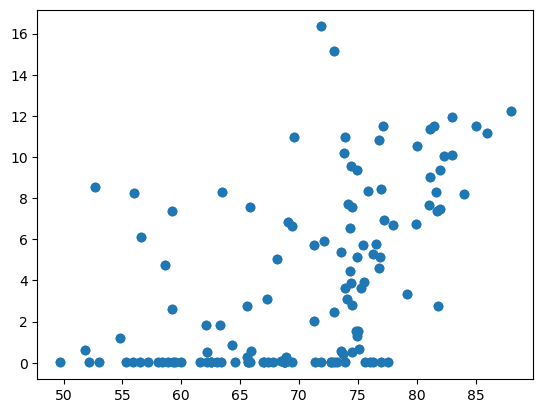

In [9]:
plt.scatter(df['Life_expectancy_'],df['Alcohol'])

In [10]:
km=KMeans(n_clusters=2)
km

KMeans(n_clusters=2)

In [11]:
y_predicted = km.fit_predict(df[['Life_expectancy_','Alcohol']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int32)

In [12]:
df['cluster']=y_predicted
#df['cluster_name']=df['cluster'].map({0:"long_lived (70-88)",1:"short-lived (49-69)"})

df.head()


/Users/joseco/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Life_expectancy_,Alcohol,cluster
0,85.0,11.49,0
1,85.0,11.49,0
2,79.9,6.76,0
3,79.9,6.76,0
4,82.3,10.03,0


In [13]:
df.to_csv('Resources/df.csv')

In [14]:
km.cluster_centers_

array([[76.38108108,  5.76621622],
       [61.96981132,  1.37169811]])

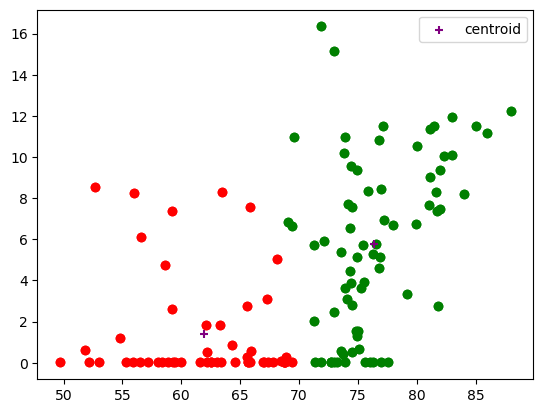

In [15]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]

plt.scatter(df1.Life_expectancy_, df1.Alcohol, color='green')
plt.scatter(df2.Life_expectancy_, df2.Alcohol, color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='+',label='centroid')
plt.legend()


In [16]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Life_expectancy_','Alcohol']])
    sse.append(km.inertia_)
sse

[22762.11868031496,
 8741.957798674144,
 5488.302275286194,
 3858.962399767316,
 2851.0462839942,
 2473.515987918392,
 2120.4538618007136,
 1755.1661619548424,
 1429.246688124098]

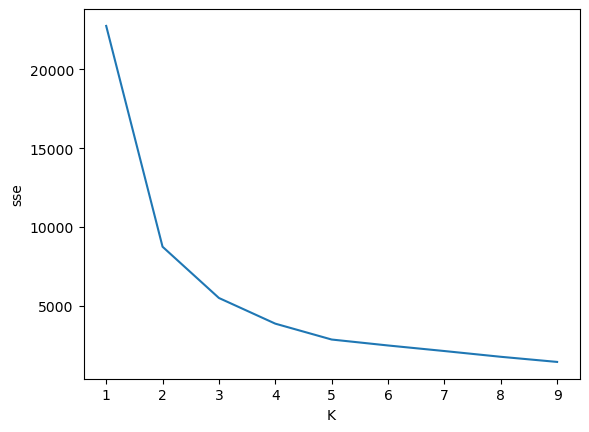

In [17]:
plt.xlabel('K')
plt.ylabel('sse')
plt.plot(k_rng,sse)

In [18]:
df.head()

,Life_expectancy_,Alcohol,cluster
0,85.0,11.49,0
1,85.0,11.49,0
2,79.9,6.76,0
3,79.9,6.76,0
4,82.3,10.03,0


In [19]:
df.shape

(254, 3)

In [20]:
categories=final.dtypes[final.dtypes=='object'].index.tolist()
categories

['RegionDisplay', 'WorldBankIncomeGroupDisplay', 'SexDisplay', 'Status']

In [21]:
final[categories].nunique()

RegionDisplay                  6
WorldBankIncomeGroupDisplay    4
SexDisplay                     2
Status                         2
dtype: int64

In [22]:

enc = OneHotEncoder(sparse=False)

encode = pd.DataFrame(enc.fit_transform(final[categories]))


encode.columns = enc.get_feature_names_out(categories)
encode.head()


,RegionDisplay_Africa,RegionDisplay_Americas,RegionDisplay_Eastern Mediterranean,RegionDisplay_Europe,RegionDisplay_South_East Asia,RegionDisplay_Western Pacific,WorldBankIncomeGroupDisplay_High_income,WorldBankIncomeGroupDisplay_Low_income,WorldBankIncomeGroupDisplay_Lower_middle_income,WorldBankIncomeGroupDisplay_Upper_middle_income,SexDisplay_Female,SexDisplay_Male,Status_Developed,Status_Developing
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [23]:
#merge
final = final.merge(encode, left_index=True, right_index=True)
final = final.drop(categories,1)
final.head()


/Users/joseco/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,Life_expectancy_,Adult_Mortality,Alcohol,percentage_expenditure,Hepatitis_B,_BMI_,Total_expenditure,GDP,Population,Income_composition_of_resources,...,RegionDisplay_South_East Asia,RegionDisplay_Western Pacific,WorldBankIncomeGroupDisplay_High_income,WorldBankIncomeGroupDisplay_Low_income,WorldBankIncomeGroupDisplay_Lower_middle_income,WorldBankIncomeGroupDisplay_Upper_middle_income,SexDisplay_Female,SexDisplay_Male,Status_Developed,Status_Developing
0,85.0,69.0,11.49,6616.695125,95.0,6.5,8.32,49231.36254,4586897.0,0.895,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,85.0,69.0,11.49,6616.695125,95.0,6.5,8.32,49231.36254,4586897.0,0.895,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,79.9,84.0,6.76,2260.777642,9.0,61.8,7.24,15431.92930,1739746.0,0.826,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,79.9,84.0,6.76,2260.777642,9.0,61.8,7.24,15431.92930,1739746.0,0.826,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,82.3,61.0,10.03,11714.998580,91.0,65.0,9.36,67677.63477,22728254.0,0.930,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [24]:
final['cluster']=df['cluster']
final.head()

,Life_expectancy_,Adult_Mortality,Alcohol,percentage_expenditure,Hepatitis_B,_BMI_,Total_expenditure,GDP,Population,Income_composition_of_resources,...,RegionDisplay_Western Pacific,WorldBankIncomeGroupDisplay_High_income,WorldBankIncomeGroupDisplay_Low_income,WorldBankIncomeGroupDisplay_Lower_middle_income,WorldBankIncomeGroupDisplay_Upper_middle_income,SexDisplay_Female,SexDisplay_Male,Status_Developed,Status_Developing,cluster
0,85.0,69.0,11.49,6616.695125,95.0,6.5,8.32,49231.36254,4586897.0,0.895,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
1,85.0,69.0,11.49,6616.695125,95.0,6.5,8.32,49231.36254,4586897.0,0.895,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
2,79.9,84.0,6.76,2260.777642,9.0,61.8,7.24,15431.92930,1739746.0,0.826,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
3,79.9,84.0,6.76,2260.777642,9.0,61.8,7.24,15431.92930,1739746.0,0.826,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0
4,82.3,61.0,10.03,11714.998580,91.0,65.0,9.36,67677.63477,22728254.0,0.930,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0


In [25]:
final.head()

,Life_expectancy_,Adult_Mortality,Alcohol,percentage_expenditure,Hepatitis_B,_BMI_,Total_expenditure,GDP,Population,Income_composition_of_resources,...,RegionDisplay_Western Pacific,WorldBankIncomeGroupDisplay_High_income,WorldBankIncomeGroupDisplay_Low_income,WorldBankIncomeGroupDisplay_Lower_middle_income,WorldBankIncomeGroupDisplay_Upper_middle_income,SexDisplay_Female,SexDisplay_Male,Status_Developed,Status_Developing,cluster
0,85.0,69.0,11.49,6616.695125,95.0,6.5,8.32,49231.36254,4586897.0,0.895,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
1,85.0,69.0,11.49,6616.695125,95.0,6.5,8.32,49231.36254,4586897.0,0.895,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
2,79.9,84.0,6.76,2260.777642,9.0,61.8,7.24,15431.92930,1739746.0,0.826,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
3,79.9,84.0,6.76,2260.777642,9.0,61.8,7.24,15431.92930,1739746.0,0.826,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0
4,82.3,61.0,10.03,11714.998580,91.0,65.0,9.36,67677.63477,22728254.0,0.930,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0


In [26]:
final['Alcohol'] = final['Alcohol'].astype(int)
final['Life_expectancy_'] = final['Life_expectancy_'].astype(int)
final['percentage_expenditure'] = final['percentage_expenditure'].astype(int)
final['Hepatitis_B'] = final['Hepatitis_B'].astype(int)
final['_BMI_'] = final['_BMI_'].astype(int)
final['Total_expenditure'] = final['Total_expenditure'].astype(int)
final['GDP'] = final['GDP'].astype(int)
final['Population'] = final['Population'].astype(int)
final['Income_composition_of_resources'] = final['Income_composition_of_resources'].astype(int)
final['Schooling'] = final['Schooling'].astype(int)
final.head()


,Life_expectancy_,Adult_Mortality,Alcohol,percentage_expenditure,Hepatitis_B,_BMI_,Total_expenditure,GDP,Population,Income_composition_of_resources,...,RegionDisplay_Western Pacific,WorldBankIncomeGroupDisplay_High_income,WorldBankIncomeGroupDisplay_Low_income,WorldBankIncomeGroupDisplay_Lower_middle_income,WorldBankIncomeGroupDisplay_Upper_middle_income,SexDisplay_Female,SexDisplay_Male,Status_Developed,Status_Developing,cluster
0,85,69.0,11,6616,95,6,8,49231,4586897,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
1,85,69.0,11,6616,95,6,8,49231,4586897,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
2,79,84.0,6,2260,9,61,7,15431,1739746,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
3,79,84.0,6,2260,9,61,7,15431,1739746,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0
4,82,61.0,10,11714,91,65,9,67677,22728254,0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0


### Exclude high correlated X variables

In [27]:
final=final.drop(columns=['Life_expectancy_','Adult_Mortality','Alcohol','Hepatitis_B','Schooling'])


In [28]:
final.head()

,percentage_expenditure,_BMI_,Total_expenditure,GDP,Population,Income_composition_of_resources,RegionDisplay_Africa,RegionDisplay_Americas,RegionDisplay_Eastern Mediterranean,RegionDisplay_Europe,...,RegionDisplay_Western Pacific,WorldBankIncomeGroupDisplay_High_income,WorldBankIncomeGroupDisplay_Low_income,WorldBankIncomeGroupDisplay_Lower_middle_income,WorldBankIncomeGroupDisplay_Upper_middle_income,SexDisplay_Female,SexDisplay_Male,Status_Developed,Status_Developing,cluster
0,6616,6,8,49231,4586897,0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
1,6616,6,8,49231,4586897,0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
2,2260,61,7,15431,1739746,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
3,2260,61,7,15431,1739746,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0
4,11714,65,9,67677,22728254,0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0


In [29]:
final.to_csv('Resources/final.csv')


In [30]:
final.columns

Index(['percentage_expenditure', '_BMI_', 'Total_expenditure', 'GDP',
       'Population', 'Income_composition_of_resources', 'RegionDisplay_Africa',
       'RegionDisplay_Americas', 'RegionDisplay_Eastern Mediterranean',
       'RegionDisplay_Europe', 'RegionDisplay_South_East Asia',
       'RegionDisplay_Western Pacific',
       'WorldBankIncomeGroupDisplay_High_income',
       'WorldBankIncomeGroupDisplay_Low_income',
       'WorldBankIncomeGroupDisplay_Lower_middle_income',
       'WorldBankIncomeGroupDisplay_Upper_middle_income', 'SexDisplay_Female',
       'SexDisplay_Male', 'Status_Developed', 'Status_Developing', 'cluster'],
      dtype='object')

In [31]:
X=final.drop(['cluster'], axis=1).values
y=final['cluster'].values

In [32]:
#X=final.drop(['Life_expectancy_'], axis=1).values
#y=final['Life_expectancy_'].values

In [33]:
print(X)
print(y)

[[6.616e+03 6.000e+00 8.000e+00 ... 1.000e+00 1.000e+00 0.000e+00]
 [6.616e+03 6.000e+00 8.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 [2.260e+03 6.100e+01 7.000e+00 ... 1.000e+00 0.000e+00 1.000e+00]
 ...
 [1.680e+02 3.000e+00 1.100e+01 ... 0.000e+00 0.000e+00 1.000e+00]
 [3.430e+02 6.800e+01 9.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 [3.430e+02 6.800e+01 9.000e+00 ... 1.000e+00 1.000e+00 0.000e+00]]
[0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1
 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1
 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0]


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [35]:
scaler = MinMaxScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Decision tree

In [36]:
model = tree.DecisionTreeClassifier()
model = model.fit(X_train_scaled, y_train)

In [37]:
predictions = model.predict(X_test_scaled)
predictions

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0],
      dtype=int32)

In [38]:
cm= confusion_matrix(y_test, predictions)
cm_df= pd.DataFrame(cm, index=['actual 0', 'actual 1'], columns=['predicted 0', 'predicted 1'])
acc_score=accuracy_score(y_test, predictions)

In [39]:
cm_df

,predicted 0,predicted 1
actual 0,32,3
actual 1,5,24


In [40]:
acc_score

0.875

In [41]:
classification=classification_report(y_test, predictions)
classification

'              precision    recall  f1-score   support\n\n           0       0.86      0.91      0.89        35\n           1       0.89      0.83      0.86        29\n\n    accuracy                           0.88        64\n   macro avg       0.88      0.87      0.87        64\nweighted avg       0.88      0.88      0.87        64\n'

# Neural Networks

In [42]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 168       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 219
Trainable params: 219
Non-trainable params: 0
_________________________________________________________________


2023-03-14 15:07:53.473248: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-14 15:07:53.474572: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [43]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [44]:
fit_model = nn.fit(X_train,y_train,epochs=100)

Train on 190 samples
Epoch 1/100
190/190 [==============================] - 1s 4ms/sample - loss: 0.6716 - accuracy: 0.5947
Epoch 2/100
190/190 [==============================] - 0s 45us/sample - loss: 0.6712 - accuracy: 0.5947
Epoch 3/100
190/190 [==============================] - 0s 48us/sample - loss: 0.6709 - accuracy: 0.5947
Epoch 4/100
190/190 [==============================] - 0s 49us/sample - loss: 0.6708 - accuracy: 0.5947
Epoch 5/100
190/190 [==============================] - 0s 49us/sample - loss: 0.6706 - accuracy: 0.5947
Epoch 6/100
190/190 [==============================] - 0s 45us/sample - loss: 0.6704 - accuracy: 0.5947
Epoch 7/100
190/190 [==============================] - 0s 51us/sample - loss: 0.6703 - accuracy: 0.5947
Epoch 8/100
190/190 [==============================] - 0s 41us/sample - loss: 0.6701 - accuracy: 0.5947
Epoch 9/100
190/190 [==============================] - 0s 53us/sample - loss: 0.6701 - accuracy: 0.5947
Epoch 10/100
190/190 [======================

190/190 [==============================] - 0s 67us/sample - loss: 0.6629 - accuracy: 0.5947
Epoch 79/100
190/190 [==============================] - 0s 75us/sample - loss: 0.6629 - accuracy: 0.5947
Epoch 80/100
190/190 [==============================] - 0s 72us/sample - loss: 0.6628 - accuracy: 0.5947
Epoch 81/100
190/190 [==============================] - 0s 66us/sample - loss: 0.6627 - accuracy: 0.5947
Epoch 82/100
190/190 [==============================] - 0s 72us/sample - loss: 0.6626 - accuracy: 0.5947
Epoch 83/100
190/190 [==============================] - 0s 47us/sample - loss: 0.6626 - accuracy: 0.5947
Epoch 84/100
190/190 [==============================] - 0s 73us/sample - loss: 0.6625 - accuracy: 0.5947
Epoch 85/100
190/190 [==============================] - 0s 73us/sample - loss: 0.6624 - accuracy: 0.5947
Epoch 86/100
190/190 [==============================] - 0s 80us/sample - loss: 0.6624 - accuracy: 0.5947
Epoch 87/100
190/190 [==============================] - 0s 79us/samp

In [45]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

64/1 - 0s - loss: 0.6923 - accuracy: 0.5469
Loss: 0.6770110130310059, Accuracy: 0.546875


## Multiple Linear Regression

In [46]:
data=merge[['WorldBankIncomeGroupDisplay','Alcohol','Status','Life_expectancy_','SexDisplay']]
data.head(20)

,WorldBankIncomeGroupDisplay,Alcohol,Status,Life_expectancy_,SexDisplay
0,High_income,11.49,Developed,85.0,Male
1,High_income,11.49,Developed,85.0,Female
2,Upper_middle_income,6.76,Developing,79.9,Male
3,Upper_middle_income,6.76,Developing,79.9,Female
4,High_income,10.03,Developed,82.3,Male
5,High_income,10.03,Developed,82.3,Female
6,Lower_middle_income,0.01,Developing,73.0,Female
7,Lower_middle_income,0.01,Developing,73.0,Male
8,Lower_middle_income,0.01,Developing,67.8,Female
9,Lower_middle_income,0.01,Developing,67.8,Male


In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data2 = data.copy()


data2['Status']=data2['Status'].map({'Developed':0,'Developing':1})
data2['SexDisplay']=data2['SexDisplay'].map({'Male':0,'Female':1})
data2['WorldBankIncomeGroupDisplay']=data2['WorldBankIncomeGroupDisplay'].map({'Low_income':0,'Lower_middle_income':1,'Upper_middle_income':2, 'High_income':3 })



data2['Status'] = le.fit_transform(data2['Status'])
data2['SexDisplay'] = le.fit_transform(data2['SexDisplay']) 
data2['WorldBankIncomeGroupDisplay'] = le.fit_transform(data2['WorldBankIncomeGroupDisplay']) 

data2=data2.drop_duplicates()
data2.head()



,WorldBankIncomeGroupDisplay,Alcohol,Status,Life_expectancy_,SexDisplay
0,3,11.49,0,85.0,0
1,3,11.49,0,85.0,1
2,2,6.76,1,79.9,0
3,2,6.76,1,79.9,1
4,3,10.03,0,82.3,0


In [48]:
X=data2.drop(['Life_expectancy_'], axis=1)
y=data2['Life_expectancy_']

In [49]:
data_scaled = scaler.fit_transform(X)
data_scaled[:5]

array([[1.        , 0.70257038, 0.        , 0.        ],
       [1.        , 0.70257038, 0.        , 1.        ],
       [0.66666667, 0.4130967 , 1.        , 0.        ],
       [0.66666667, 0.4130967 , 1.        , 1.        ],
       [1.        , 0.61321909, 0.        , 0.        ]])

In [50]:
print(np.mean(data_scaled[:,0]))
print(np.std(data_scaled[:,0]))

0.4543010752688172
0.3369020720148157


In [51]:
X=data_scaled
X.shape


(248, 4)

In [52]:
y.shape

(248,)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 78)

In [54]:
mlr = LinearRegression()  
mlr.fit(X_train, y_train)

LinearRegression()

In [55]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(X, mlr.coef_))

Intercept:  63.658624799665134
Coefficients:


[(array([1.        , 0.70257038, 0.        , 0.        ]), 18.10053498958458),
 (array([1.        , 0.70257038, 0.        , 1.        ]),
  -0.40588364535492893),
 (array([0.66666667, 0.4130967 , 1.        , 0.        ]),
  -2.1492786076244204),
 (array([0.66666667, 0.4130967 , 1.        , 1.        ]),
  0.49298187039813374)]

In [56]:
#Prediction of test set
y_pred_mlr= mlr.predict(X_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [75.47228135 79.44370238 73.57636952 67.47355459 73.93819682 74.06935139
 61.48798389 67.97448522 67.54285786 67.33842564 73.86342878 81.51026419
 68.03583973 67.54285786 81.57335748 67.9590845  68.03583973 68.03583973
 79.93668425 73.49365272 73.40870033 67.54285786 67.54285786 67.54285786
 67.96777845 67.41542927 75.84280261 62.00232806 61.50934619 81.94785313
 73.57636952 67.35506836 67.54285786 62.00232806 73.38907682 73.42931743
 68.03583973 61.50934619 61.50934619 81.53460727 73.5383645  75.48793047
 61.46463441 68.03583973 67.93946099 68.03583973 82.06857494 81.95530509
 73.9419228  61.88458703 62.00232806 82.02013718 67.47479658 61.50934619
 67.96653646 74.06935139 73.95931072 73.34361984 67.84805023 73.95508794
 61.85130159 81.56888631 61.50934619 61.95761628 73.98663459 67.89350721
 67.40052534 61.98717574 81.96697983 73.44521495 73.89696262 67.44573392
 67.33345766 73.9001918  67.84457265]


In [57]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
98,73.8,75.472281
246,78.0,79.443702
139,72.7,73.576370
94,74.5,67.473555
249,76.3,73.938197


In [62]:
#Model Evaluation
#from sklearn import metrics
#meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
#meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
#rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
#print('R squared: {:.2f}'.format(mlr.score(X,y)*100))
#print('Mean Absolute Error:', meanAbErr)
#print('Mean Square Error:', meanSqErr)
#print('Root Mean Square Error:', rootMeanSqErr)

In [59]:
import statsmodels.api as sm

In [60]:
linear_model = sm.OLS(y,X).fit()

In [61]:
print(linear_model.summary())

                                 OLS Regression Results                                
Dep. Variable:       Life_expectancy_   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              1377.
Date:                Tue, 14 Mar 2023   Prob (F-statistic):                   4.17e-166
Time:                        15:07:56   Log-Likelihood:                         -1017.1
No. Observations:                 248   AIC:                                      2042.
Df Residuals:                     244   BIC:                                      2056.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------